# PennyLane tutorial
This notebook demonstrates basic PennyLane usage. It is organized in sequential code cells.

## What is quantum simulator?
Quantum simulators such as PennyLane and Qiskit provide software environments for designing, running, and analyzing quantum circuits on classical computers. They simulate the behavior of qubits and gates, allowing users to prototype quantum algorithms without access to physical hardware.


**PennyLane** focuses on differentiable quantum programming and **hybrid quantum–classical machine learning**. It treats quantum circuits as differentiable computational graphs, enabling gradient-based optimization of variational circuits and quantum kernels. Circuits in PennyLane are created inside QNodes, which are Python functions decorated with @qml.qnode and filled with gate operations acting on specified wires.

**Qiskit**, in contrast, is a general-purpose quantum computing framework emphasizing circuit construction, transpilation, and hardware execution on IBM quantum devices.

In [ ]:
import os

github_repo_url = 'https://github.com/delilbasic/ingarss2025.git'
!git clone {github_repo_url}
repo_folder_name = 'ingarss2025'
os.chdir(repo_folder_name)
!bash install_requirements.sh

In [ ]:
import sys
import time
from pprint import pprint

In [4]:
# PennyLane and its NumPy wrapper
import pennylane as qml
import pennylane.numpy as np
from pennylane import math
from scipy.linalg import logm

# Qiskit for visualization
from qiskit.visualization import plot_bloch_vector

In [5]:
# Scientific stack
import numpy as onp
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, preprocessing

In [6]:
# Optional ML backends (wrapped imports to allow graceful failure if not installed)
try:
    import torch
    TORCH_AVAILABLE = True
except Exception:
    torch = None
    TORCH_AVAILABLE = False

try:
    import tensorflow as tf
    TF_AVAILABLE = True
except Exception:
    tf = None
    TF_AVAILABLE = False

In [7]:
# Utility: random seed for reproducibility
SEED = 42
np.random.seed(SEED)
onp.random.seed(SEED)

In [8]:
# Create a small helper to print installed versions (useful for reproducibility)
def print_versions():
    deps = {
        "python": sys.version.splitlines()[0],
        "pennylane": qml.__version__,
        "pennylane.numpy": qml.numpy.__name__ if hasattr(qml, 'numpy') else 'n/a',
        "numpy": onp.__version__,
        "matplotlib": plt.matplotlib.__version__,
        "scikit-learn": getattr(__import__('sklearn'), '__version__', 'n/a'),
        "torch": torch.__version__ if TORCH_AVAILABLE else 'not installed',
        "tensorflow": tf.__version__ if TF_AVAILABLE else 'not installed',
    }
    pprint(deps)

In [9]:
# Create a default device we will use in examples (adjust wires later when needed)
default_wires = 1
dev = qml.device("default.qubit", wires=default_wires)

# Print a short summary so the user sees the environment
print("PennyLane QML tutorial environment initialized.\n")
print_versions()

PennyLane QML tutorial environment initialized.

{'matplotlib': '3.10.7',
 'numpy': '2.3.5',
 'pennylane': '0.43.1',
 'pennylane.numpy': 'pennylane.numpy',
 'python': '3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, '
           '11:09:21) [Clang 14.0.6 ]',
 'scikit-learn': '1.7.2',
 'tensorflow': 'not installed',
 'torch': 'not installed'}


In [10]:
def bloch_from_state(state):
    """Return the Bloch vector (x,y,z) for a one-qubit state."""
    sigma_x = np.array([[0,1],[1,0]])
    sigma_y = np.array([[0,-1.0j],[1.0j,0]])
    sigma_z = np.array([[1,0],[0,-1]])

    rho = math.outer(state, math.conj(state))
    bx = math.real(math.trace(rho @ sigma_x))
    by = math.real(math.trace(rho @ sigma_y))
    bz = math.real(math.trace(rho @ sigma_z))
    return onp.array([bx, by, bz])

In [11]:
@qml.qnode(dev)
def circuit_X():
    qml.PauliX(0)
    return qml.state()

@qml.qnode(dev)
def circuit_Y():
    qml.PauliY(0)
    return qml.state()

@qml.qnode(dev)
def circuit_Z():
    qml.PauliZ(0)
    return qml.state()

@qml.qnode(dev)
def circuit_H():
    qml.Hadamard(0)
    return qml.state()

@qml.qnode(dev)
def circuit_Rx(theta=0.7):
    qml.RX(theta, 0)
    return qml.state()

@qml.qnode(dev)
def circuit_Ry(theta=0.7):
    qml.RY(theta, 0)
    return qml.state()

Gate X, Bloch vector: [ 0.  0. -1.]


(<Figure size 400x200 with 1 Axes>, <Axes: >)

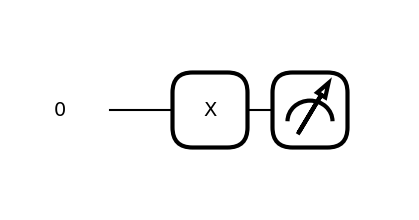

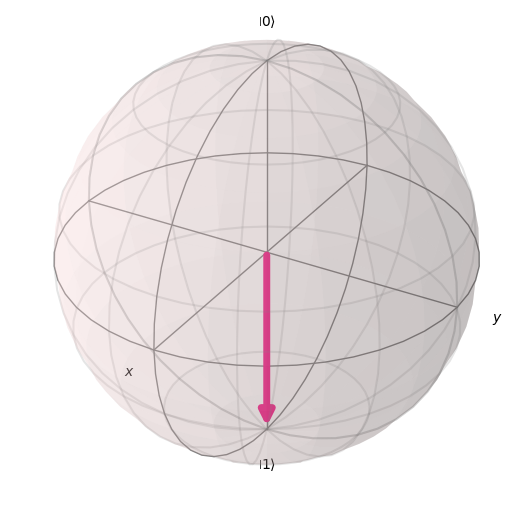

Gate Y, Bloch vector: [ 0.  0. -1.]


(<Figure size 400x200 with 1 Axes>, <Axes: >)

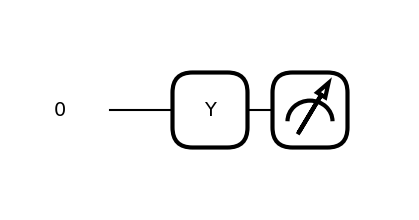

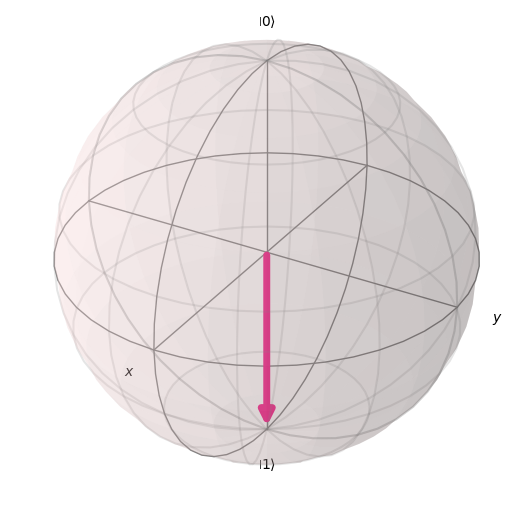

Gate Z, Bloch vector: [0. 0. 1.]


(<Figure size 400x200 with 1 Axes>, <Axes: >)

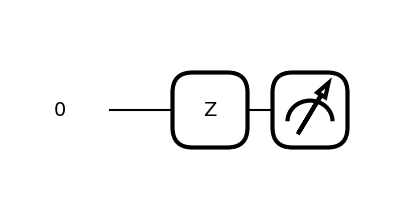

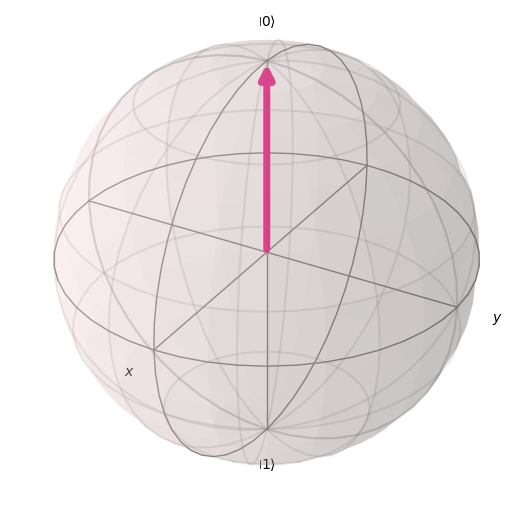

Gate H, Bloch vector: [1. 0. 0.]


(<Figure size 400x200 with 1 Axes>, <Axes: >)

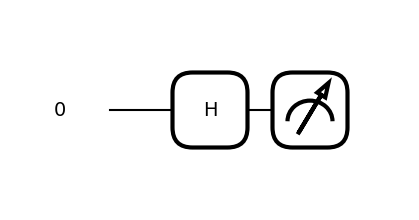

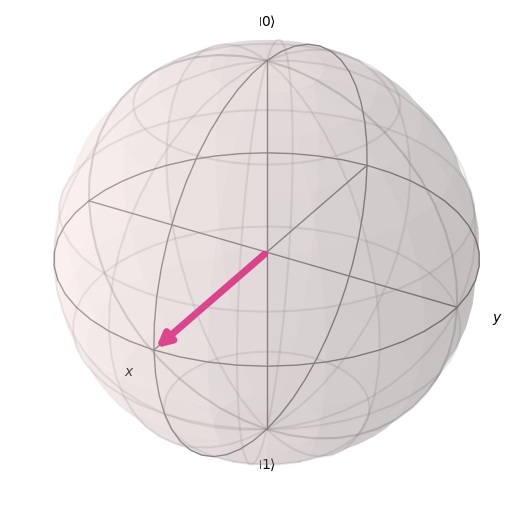

Gate RX(0.7), Bloch vector: [ 0.         -0.64421769  0.76484219]


(<Figure size 400x200 with 1 Axes>, <Axes: >)

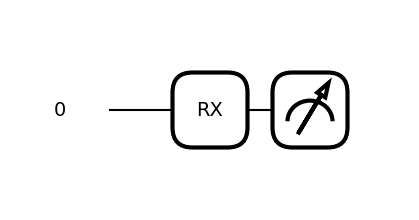

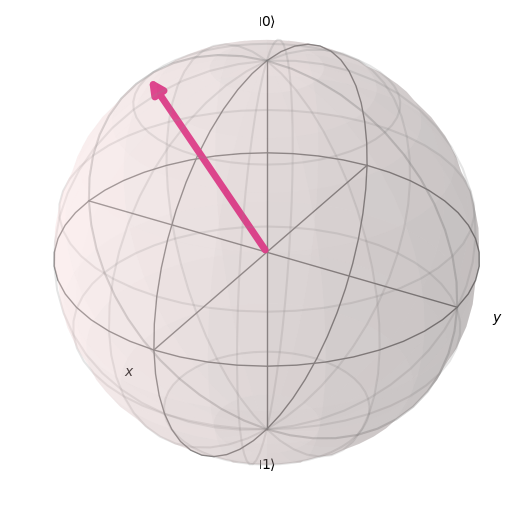

Gate RY(0.7), Bloch vector: [0.64421769 0.         0.76484219]


(<Figure size 400x200 with 1 Axes>, <Axes: >)

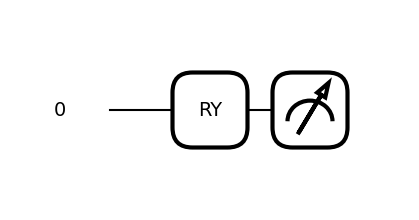

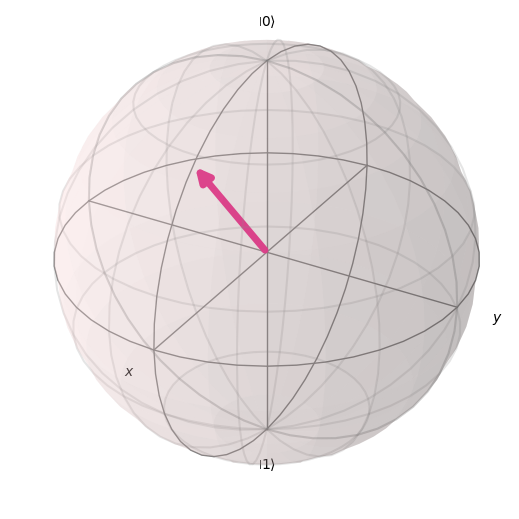

In [14]:
# Run each circuit, print Bloch vectors, and plot
circuits = {
    "X": circuit_X,
    "Y": circuit_Y,
    "Z": circuit_Z,
    "H": circuit_H,
    "RX(0.7)": circuit_Rx,
    "RY(0.7)": circuit_Ry,
}

results = {}
for name, circ in circuits.items():
    state = circ()
    bloch = bloch_from_state(state)
    results[name] = bloch
    print(f"Gate {name}, Bloch vector: {bloch}")
    display(qml.draw_mpl(circ)())
    plt.show()
    display(plot_bloch_vector(bloch))


Gate RY(0.7), Bloch vector: [0. 0. 1.]


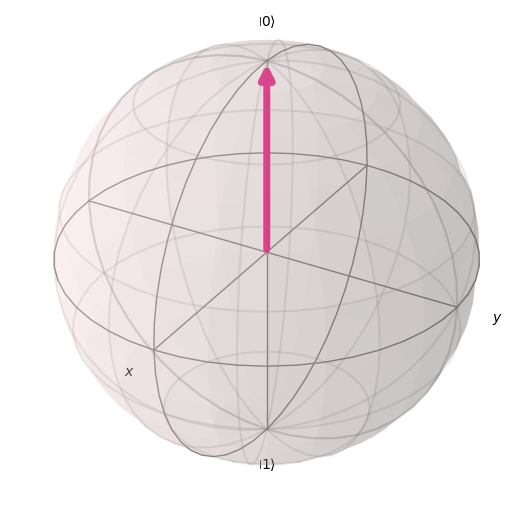

Gate RY(0.7), Bloch vector: [ 0.         -0.84147098  0.54030231]


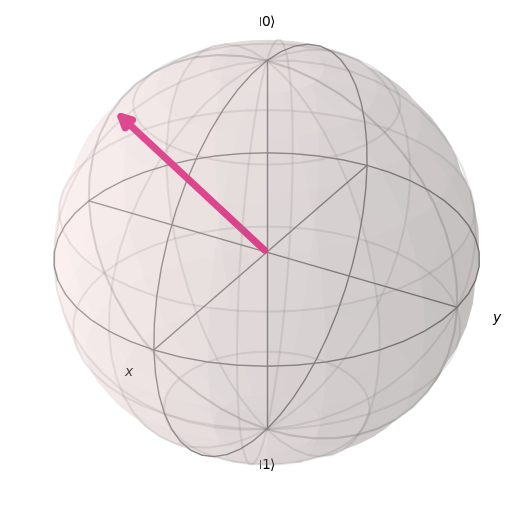

Gate RY(0.7), Bloch vector: [ 0.         -0.90929743 -0.41614684]


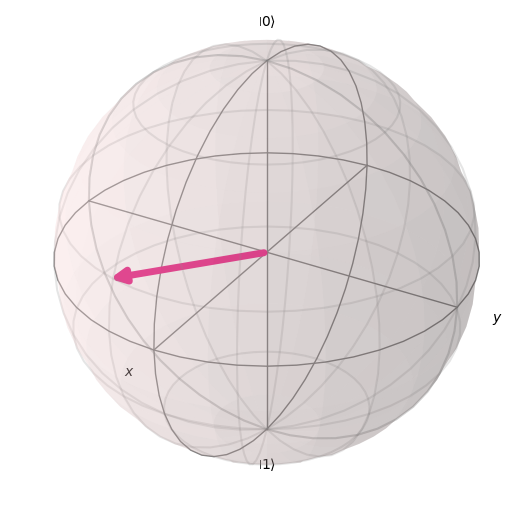

Gate RY(0.7), Bloch vector: [ 0.         -0.14112001 -0.9899925 ]


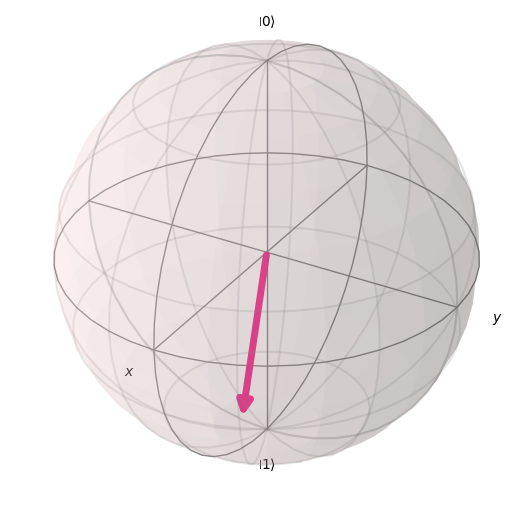

Gate RY(0.7), Bloch vector: [ 0.          0.7568025  -0.65364362]


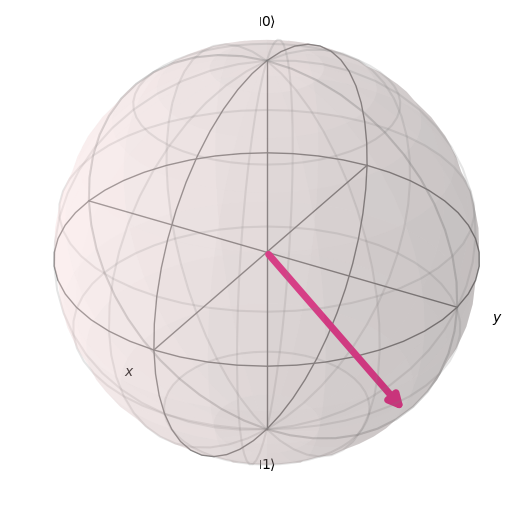

Gate RY(0.7), Bloch vector: [0.         0.95892427 0.28366219]


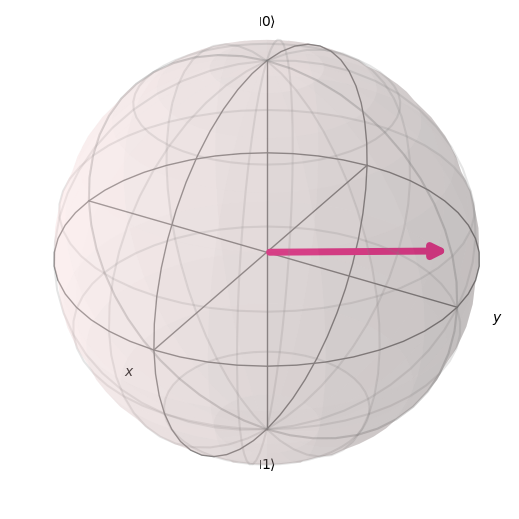

Gate RY(0.7), Bloch vector: [0.         0.2794155  0.96017029]


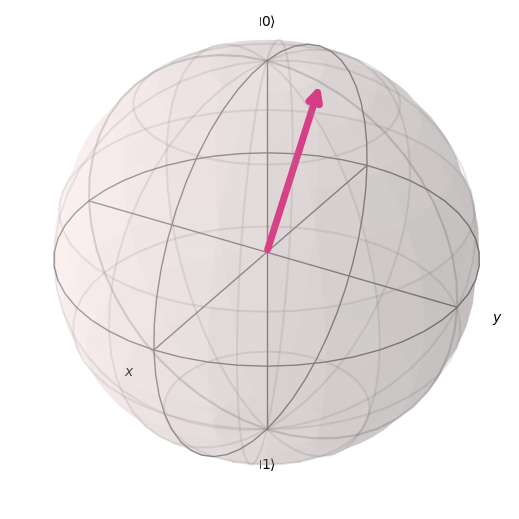

In [15]:
angles = np.arange(0,2*np.pi,1)

for alpha in angles:
    state = circuit_Rx(alpha)
    bloch = bloch_from_state(state)
    results[name] = bloch
    print(f"Gate {name}, Bloch vector: {bloch}")
    display(plot_bloch_vector(bloch))

## Two qubits

Bell+ state is:

$|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left( |00\rangle + |11\rangle \right)$

It is a maximally entangled state. It cannot be written as a product of two states $| \varphi_0 \rangle | \varphi_1 \rangle \neq |\Psi^+\rangle$.

Observe that if one knows the state of one qubit, the state of the other one is determined, even without measurement.

The circuit which creates Bell+ state is given below. Observe that is uses a two-qubit CNOT gate. It is an entangled state, thus I cannot be created solely with one-qubit gates.

Check that the resulting state of the circuit is indeed $|\Psi^+\rangle$.

Comment:

Two-qubit basis states are ordered in the following way:
$|00\rangle = [1,0,0,0], |01\rangle = [0,1,0,0], |10\rangle = [0,0,1,0], |11\rangle = [0,0,0,1]$

Bell+ state vector:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


(<Figure size 500x300 with 1 Axes>, <Axes: >)

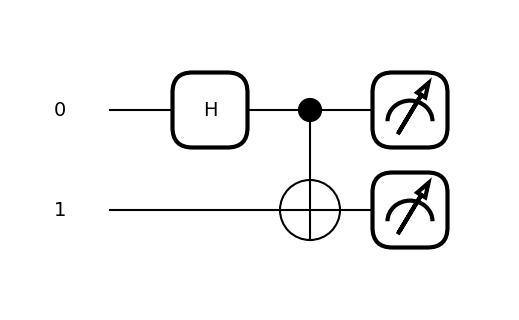

In [16]:
# Device with 2 qubits
bell_dev = qml.device("default.qubit", wires=2)

@qml.qnode(bell_dev)
def bell_plus():
    """Prepare the |Φ⁺⟩ Bell state."""
    qml.Hadamard(0)
    qml.CNOT(wires=[0,1])
    return qml.state()

# Compute and print the state
bell_state = bell_plus()
print("Bell+ state vector:")
print(bell_state)
qml.draw_mpl(bell_plus)()


Can you propose a circuit to create a Bell- state, $|\Phi^-\rangle =  \frac{1}{\sqrt{2}}\left( |00\rangle - |11\rangle \right)$?

In [17]:
@qml.qnode(bell_dev)
def bell_minus():
    """Prepare the |Φ−⟩ Bell state."""
    #-Your gates here-
    #.................
    
    #Example of the solution
    #qml.Hadamard(0)
    #qml.CNOT(wires=[0, 1])
    #qml.PauliZ(0)
    return qml.state()

# Compute and print the state
bell_minus_state = bell_minus()
print("Bell- state vector:")
print(bell_minus_state)

Bell- state vector:
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


There are multiple measures of entanglement. We will adopt here the Von Neumann entanglement entropy. 
Assume that we can partition the system into two subsysytems A and B. For example, A - first qubit, B - second qubit.
$$ S(\rho_A) = -Tr[\rho_A log (\rho_A)] = -Tr[\rho_B log (\rho_B)] = S(\rho_B) $$
Additionally, we define a mean entanglement entropy, by taking the average over the one-qubit-vs-all entanglement entropy.
$$ \langle S \rangle (\rho) = \frac{1}{n} \sum_{i=0}^{n-1} S(\rho_{\bar{i}}), $$
where $n$ is the number of qubits and $\bar{i}$ indicates the subsystem consisting of all qubits, expect $i^{th}$.

In [18]:
def entanglement_entropy(state, subsystem=0):
    """
    Compute the von Neumann entanglement entropy S(rho_A)
    for a n-qubit pure state |ψ⟩.
    
    subsystem = 0  -> trace out every qubit except qubit 0
    subsystem = 1  -> trace out every qubit except qubit 1
    ...
    """
    n = int(np.log2(state.shape[0]))
    all_indices = [i for i in range(n)]
    indices_to_trace = [item for item in all_indices if item != subsystem]
    # Convert statevector to density matrix ρ = |ψ⟩⟨ψ|
    rho = np.outer(state, np.conj(state))

    # Reduced density matrix
    rho_red = qml.math.partial_trace(rho, indices=indices_to_trace)

    # Eigenvalues
    eigs = np.linalg.eigvalsh(rho_red)

    # Von Neumann entropy S = -Tr(ρ log₂ρ)
    entropy = -np.sum(eigs * np.log2(eigs + 1e-12))
    entropy = onp.around(entropy, decimals=10)
    return float(entropy)

def relative_entropy(state, subsystem=0):
    n = int(np.log2(state.shape[0]))
    all_indices = [i for i in range(n)]
    indices_to_trace = [item for item in all_indices if item != subsystem]
    rho = np.outer(state, np.conj(state))
    rho_red = qml.math.partial_trace(rho, indices=indices_to_trace)
    rho_mms = np.eye(state.shape[0]) / state.shape[0]
    log_red = logm(rho_red)
    log_mms = logm(rho_mms)
    rel_entropy = onp.matrix.trace(log_red @ (log_red - log_mms))
    return rel_entropy

def mean_entropy(state):
    n = int(np.log2(state.shape[0]))
    entropies = []
    for n_id in range(n):
        entropies.append(entanglement_entropy(state, subsystem=n_id))
    entropies = np.array(entropies)
    mean_entropy = entropies.mean()
    return(float(mean_entropy))

In [19]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def separable_state():
    """Prepare some separable state."""
    qml.Hadamard(0)
    qml.Hadamard(1)
    return qml.state()

@qml.qnode(dev)
def intermediate_state():
    qml.RY(onp.pi/4, 0)
    qml.CNOT([0,1])
    return qml.state()

In [20]:
s_state = separable_state()
b_state = bell_plus()
i_state = intermediate_state()
print("Separable state entropy: ",mean_entropy(s_state))
print("Bell state entropy: ",mean_entropy(b_state))
print("Intermediate state entropy: ",mean_entropy(i_state))
print("Intermediate state: ", i_state)

Separable state entropy:  0.0
Bell state entropy:  1.0
Intermediate state entropy:  0.6008760367
Intermediate state:  [0.92387953+0.j 0.        +0.j 0.        +0.j 0.38268343+0.j]


## Multi-qubit systems

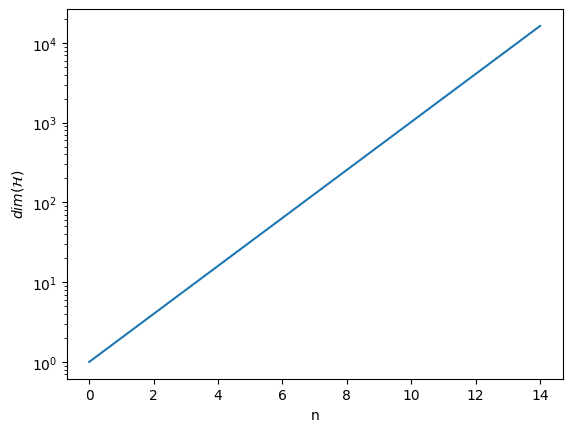

In [21]:
dim = []

for n_wires in range(15):
    dev = qml.device("default.qubit", wires=n_wires)
    @qml.qnode(dev)
    def separable_state():
        """Empty circuit."""
        return qml.state()
    
    state = separable_state()
    dim.append(state.shape[0])

plt.plot(dim)
plt.yscale('log')
plt.ylabel(r'$dim(\mathcal{H})$')
plt.xlabel('n')
plt.show()

In [22]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def GHZ():
    """circuit generating GHZ state"""
    qml.H(0)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    return qml.state()

print(GHZ())

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
